AlexNet

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_data_dir = 'drive/My Drive/Colab Notebooks/frames-only_face_dataset/'
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    validation_split=0.1) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 6034 images belonging to 8 classes.
Found 666 images belonging to 8 classes.


In [4]:
print(train_generator)

AlexNet

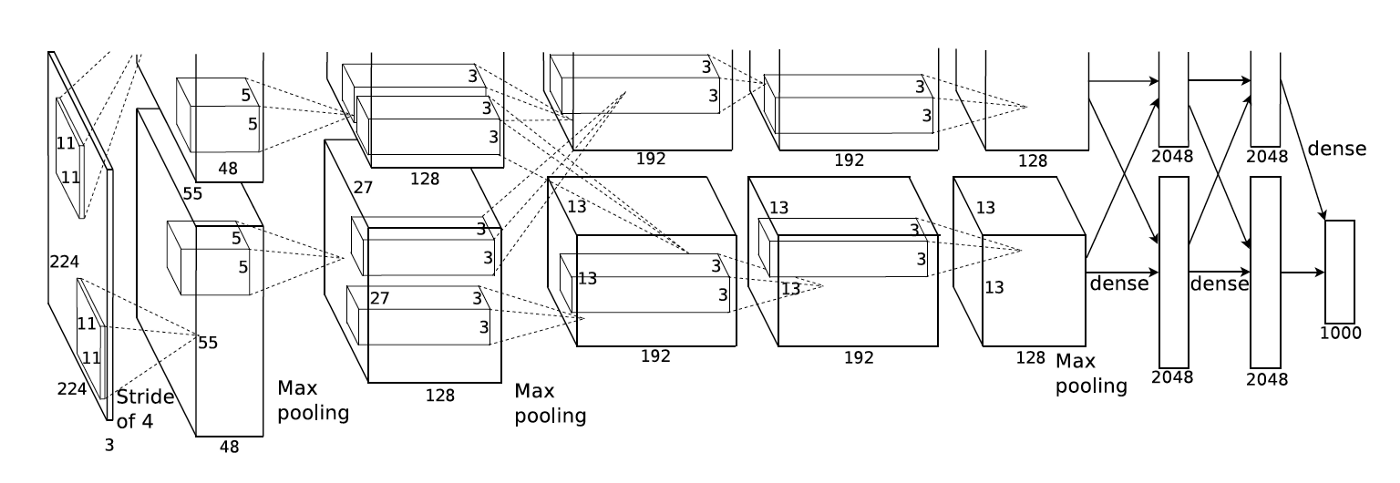

In [5]:
#AlexNet
def createModel():

    input_shape = (227, 227, 3)
    num_classes = 8

    #Instantiation
    AlexNet = Sequential()

    AlexNet.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
    AlexNet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

    AlexNet.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
    AlexNet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

    AlexNet.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

    AlexNet.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

    AlexNet.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

    AlexNet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

    AlexNet.add(Flatten())
    AlexNet.add(Dense(4096, activation= 'relu'))
    AlexNet.add(Dense(4096, activation= 'relu'))
    AlexNet.add(Dense(1000, activation= 'relu'))
    AlexNet.add(Dense(num_classes, activation= 'softmax'))

    return AlexNet

In [6]:
model = createModel()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [15]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
_epochs = 100

# Fit the model on the batches generated by datagen.flow().
'''history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 15)'''

filepath = 'drive/My Drive/Colab Notebooks/saved-model-{epoch:02d}-{val_loss:.2f}.h.hdf5'
earlyStop = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
callbacks_list = [earlyStop, checkpoint]

model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=_epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list)

Epoch 1/100
47/47 [==============================] - ETA: 0s - loss: 1.2129 - accuracy: 0.5243
Epoch 00001: val_loss improved from inf to 1.76278, saving model to drive/My Drive/Colab Notebooks/saved-model-01-1.76.h.hdf5
47/47 [==============================] - 427s 9s/step - loss: 1.2129 - accuracy: 0.5243 - val_loss: 1.7628 - val_accuracy: 0.3625
Epoch 2/100
47/47 [==============================] - ETA: 0s - loss: 1.0060 - accuracy: 0.6057
Epoch 00002: val_loss improved from 1.76278 to 1.57831, saving model to drive/My Drive/Colab Notebooks/saved-model-02-1.58.h.hdf5
47/47 [==============================] - 419s 9s/step - loss: 1.0060 - accuracy: 0.6057 - val_loss: 1.5783 - val_accuracy: 0.4125
Epoch 3/100
47/47 [==============================] - ETA: 0s - loss: 0.9474 - accuracy: 0.6273
Epoch 00003: val_loss did not improve from 1.57831
47/47 [==============================] - 419s 9s/step - loss: 0.9474 - accuracy: 0.6273 - val_loss: 1.6088 - val_accuracy: 0.4375
Epoch 4/100
47/47 

In [9]:
model.save('drive/My Drive/Colab Notebooks/AlexNet.h5') 

In [16]:
test_data_dir = 'drive/My Drive/Colab Notebooks/frames-emotion_based_test_dataset/'
batch_size = 64

datagen = ImageDataGenerator()
test_generator = train_datagen.flow_from_directory(test_data_dir, class_mode='categorical', batch_size=64)

Found 1346 images belonging to 8 classes.


In [17]:
loss = model.evaluate(test_generator)

22/22 [==============================] - 369s 17s/step - loss: 4.6319 - accuracy: 0.1880
